In [1]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

#### Preprocesamiento necesarias: Nulos y Outliers

In [2]:
df = pd.read_csv('Porto_clean.csv')
#Confirmamos que no hayan valores nulos
df.isnull().sum()

Unnamed: 0                                      0
host_name                                       0
host_about                                      0
host_response_time                              0
neighbourhood                                   0
neighbourhood_group_cleansed                    0
bathrooms_text                                  0
host_is_superhost                               0
room_type                                       0
host_has_profile_pic                            0
host_identity_verified                          0
property_type                                   0
has_availability                                0
instant_bookable                                0
id                                              0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0


In [3]:
df = df.drop(columns=['Unnamed: 0','host_about','host_name','neighbourhood_group_cleansed', 'bathrooms_text'])
df.head()

,host_response_time,neighbourhood,host_is_superhost,room_type,host_has_profile_pic,host_identity_verified,property_type,has_availability,instant_bookable,id,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,3,1,1,1,1,1,1,1,2,41339,...,4.73,4.85,4.88,4.85,4.62,4.69,1.0,1.0,0.0,0.18
1,3,1,1,1,1,1,1,1,2,55111,...,4.80,4.75,4.90,4.90,4.79,4.79,3.0,3.0,0.0,0.17
2,3,1,1,1,1,1,1,1,2,73828,...,5.00,4.87,5.00,5.00,4.93,4.80,3.0,3.0,0.0,0.13
3,1,1,2,1,1,1,1,1,2,87873,...,4.87,4.89,4.97,4.94,4.52,4.81,4.0,2.0,2.0,1.60
4,1,1,2,1,1,1,1,1,2,94701,...,4.84,4.84,4.94,4.95,4.85,4.77,1.0,1.0,0.0,1.81


In [4]:
df.dtypes

host_response_time                                int64
neighbourhood                                     int64
host_is_superhost                                 int64
room_type                                         int64
host_has_profile_pic                              int64
host_identity_verified                            int64
property_type                                     int64
has_availability                                  int64
instant_bookable                                  int64
id                                                int64
host_id                                           int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_listings_count                             float64
host_total_listings_count                       float64
latitude                                        float64
longitude                                       float64
accommodates                                    

#### Modelos no lineales

#### host_response_rate (variable objetivo)

In [5]:
corr_Factors = df.corr()[['host_response_rate']]
corr_Factors = abs(corr_Factors)

<Axes: >

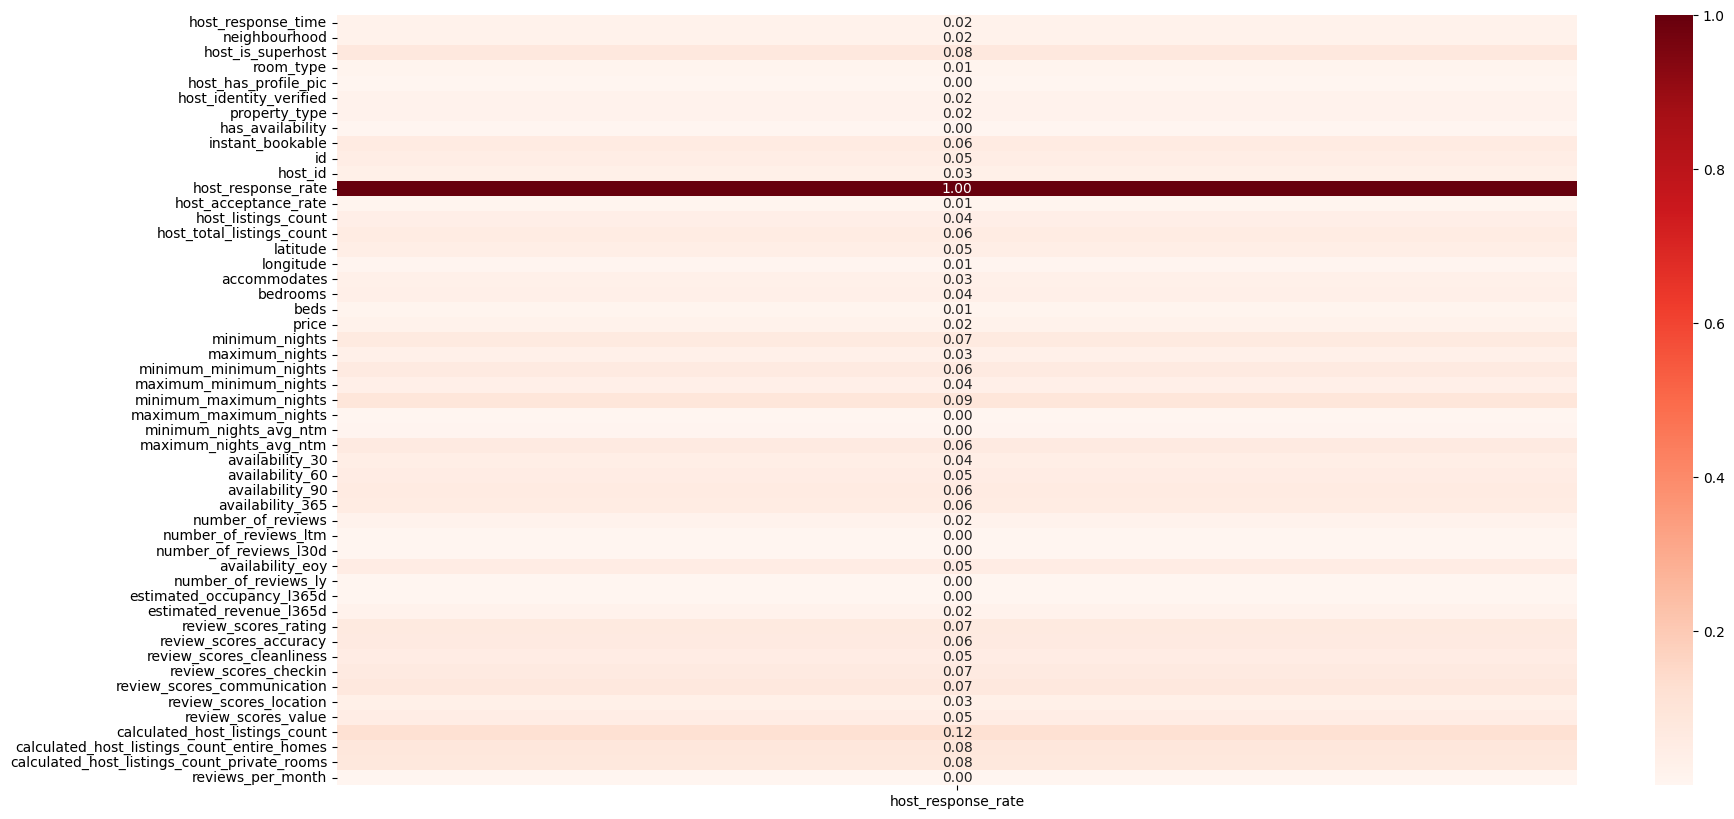

In [6]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [7]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['calculated_host_listings_count']]
Var_Dep= df['host_response_rate']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [8]:
#Función cuadrática
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['calculated_host_listings_count'], df['host_response_rate'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función cuadrática: [ 3.73525108e-04 -1.86520953e-02  9.99788613e+01]
Predicciones:    calculated_host_listings_count
0                       99.960583
1                       99.926267
2                       99.926267
3                       99.910229
4                       99.960583


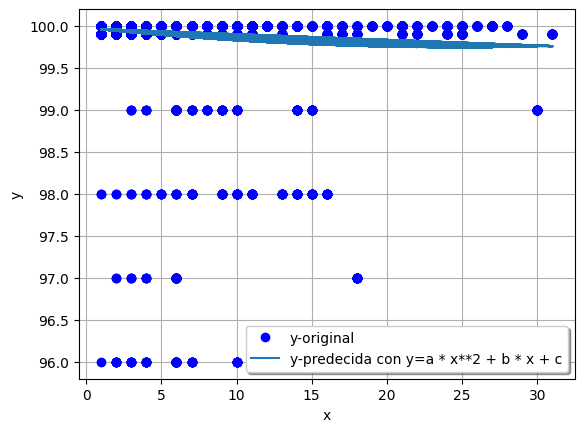

In [9]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [10]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.01704890149929572
Coeficiente de correlación: 0.13057144212765562


##### Modelo 2

In [11]:
#Función exponencial
def  func1 (x, a, b, c):
     return a * np.exp(-b * x) + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['calculated_host_listings_count'], df['host_response_rate'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función exponencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función exponencial: [ 0.25309056  0.11171562 99.74273528]
Predicciones:    calculated_host_listings_count
0                       99.969074
1                       99.923754
2                       99.923754
3                       99.904620
4                       99.969074


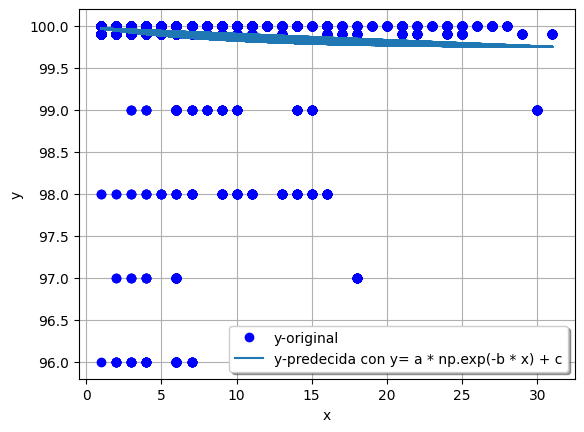

In [12]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y= a * np.exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [13]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.017733971973943663
Coeficiente de correlación: 0.13316896024954036


#### host_acceptance_rate (variable objetivo)

In [14]:
corr_Factors = df.corr()[['host_acceptance_rate']]
corr_Factors = abs(corr_Factors)

<Axes: >

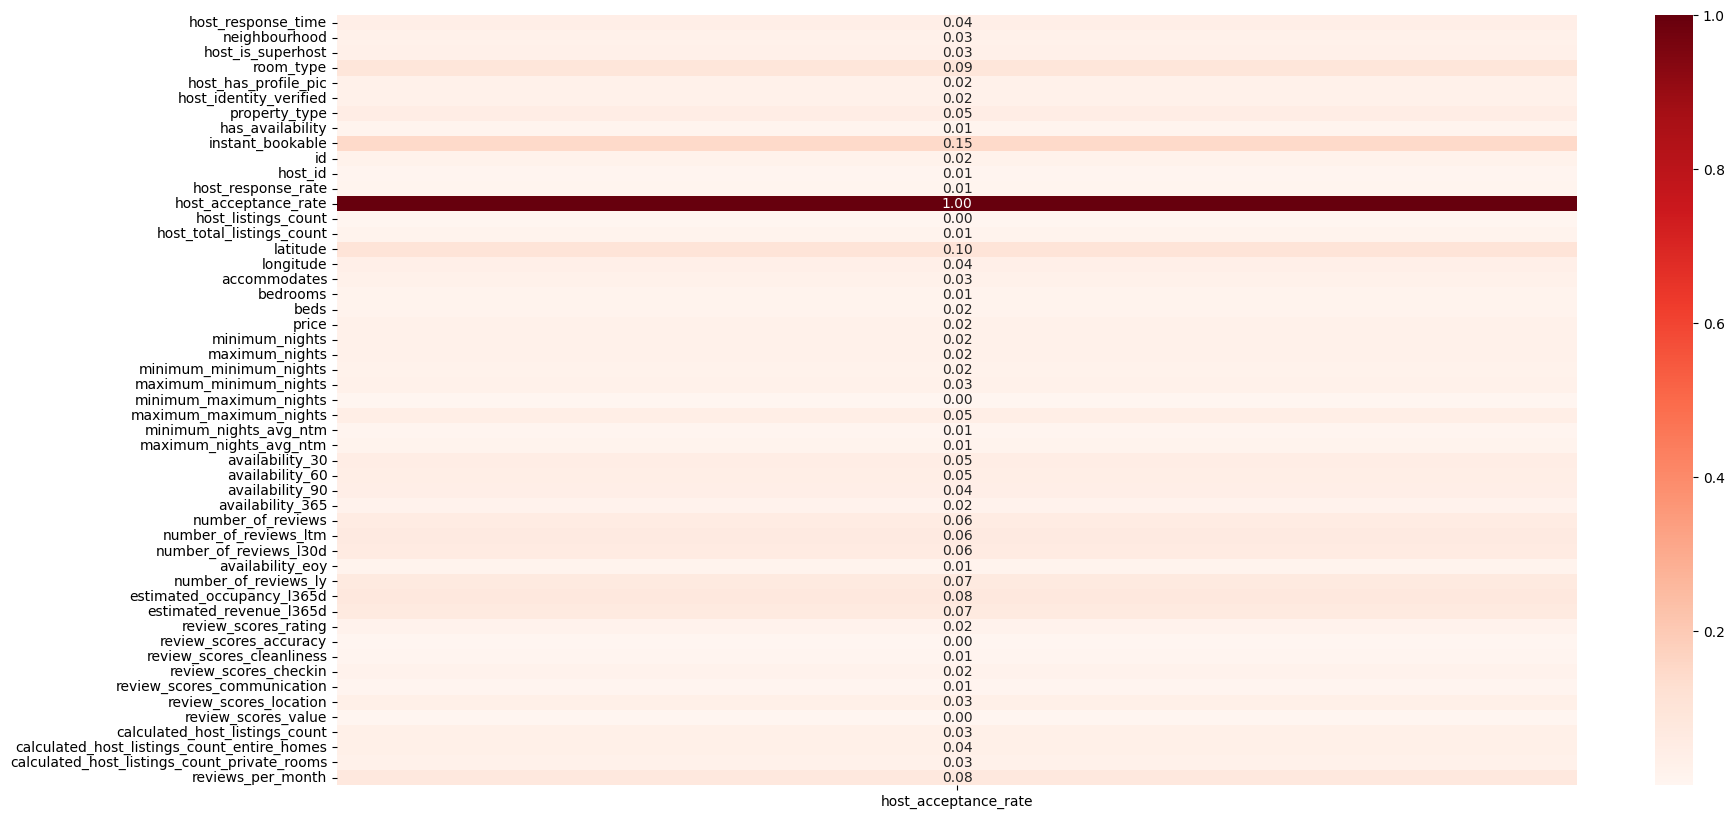

In [15]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [16]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['instant_bookable']]
Var_Dep= df['host_acceptance_rate']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [17]:
#Función tangencial
def  func1 (x, a, b, c):
     return a*np.tan(x) + b
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['instant_bookable'], df['host_acceptance_rate'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función tangencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función tangencial: [ 0.10865012 99.3446874   1.        ]
Predicciones:    instant_bookable
0         99.107283
1         99.107283
2         99.107283
3         99.107283
4         99.107283


/var/folders/6g/_xkwmvhx4_sg_spcn348_2wc0000gn/T/ipykernel_2240/1398261697.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs= curve_fit(func1, df['instant_bookable'], df['host_acceptance_rate'])


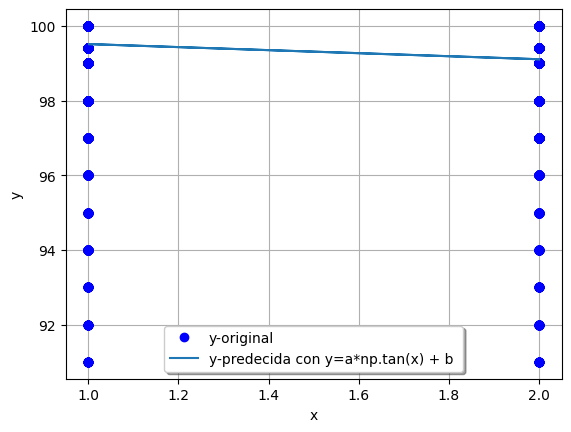

In [18]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.tan(x) + b ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [19]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.021166721965994784
Coeficiente de correlación: 0.1454878756666506


##### Modelo 2

In [20]:
#Función logarítmica
def  func1 (x, a, b):
     return a*np.log(x) + b
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['instant_bookable'], df['host_acceptance_rate'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función logarítmica:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función logarítmica: [-0.58662596 99.51389994]
Predicciones:    instant_bookable
0         99.107282
1         99.107282
2         99.107282
3         99.107282
4         99.107282


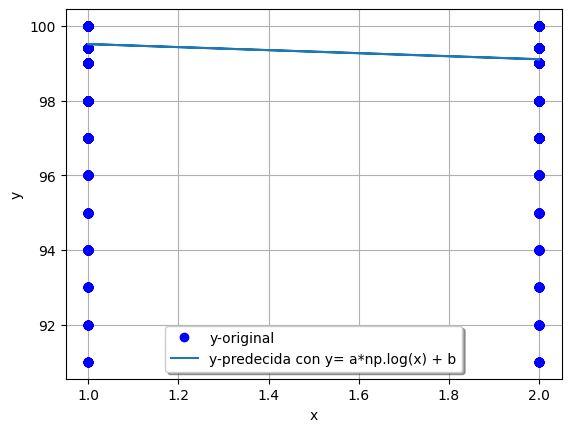

In [21]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y= a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [22]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.02116672196588565
Coeficiente de correlación: 0.14548787566627552


#### host_total_listings_count (variable objetivo)

In [23]:
corr_Factors = df.corr()[['host_total_listings_count']]
corr_Factors = abs(corr_Factors)

<Axes: >

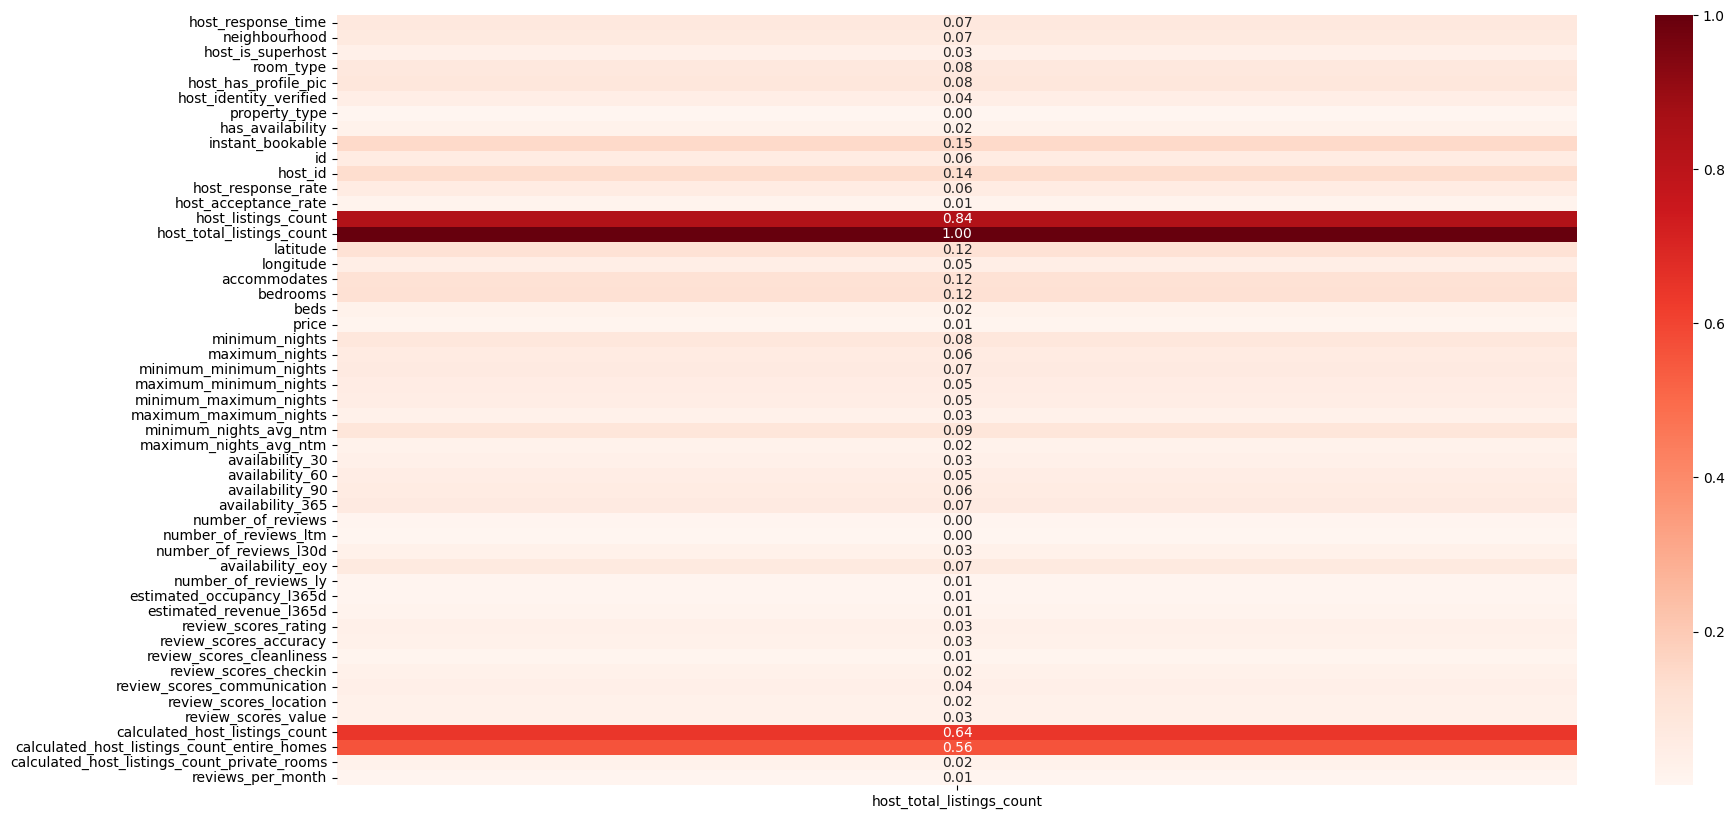

In [24]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [25]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_listings_count']]
Var_Dep= df['host_total_listings_count']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [26]:
#Función cuadrática
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['host_listings_count'], df['host_total_listings_count'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función cuadrática: [-0.01475247  1.46633378 -0.29312743]
Predicciones:    host_listings_count
0            28.543331
1             3.973102
2             3.973102
3             5.336168
4             1.158454


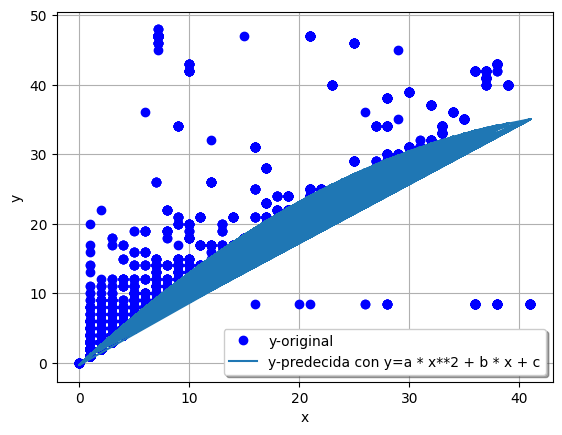

In [27]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [28]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.7165356697102365
Coeficiente de correlación: 0.8464842997423145


##### Modelo 2

In [29]:
#Función senoidal
def  func1 (x, a, b):
     return a*np.sin(x) + b
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['host_listings_count'], df['host_total_listings_count'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función senoidal', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función senoidal [-2.97482886  9.50494094]
Predicciones:    host_listings_count
0             6.659886
1             9.085133
2             9.085133
3            11.756299
4             7.001709


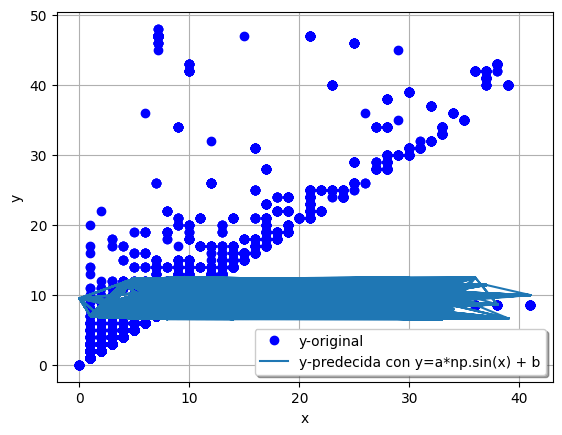

In [30]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.sin(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [31]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.0451935133580581
Coeficiente de correlación: 0.2125876604087314


#### accommodates (variable objetivo)

In [32]:
corr_Factors = df.corr()[['accommodates']]
corr_Factors = abs(corr_Factors)

<Axes: >

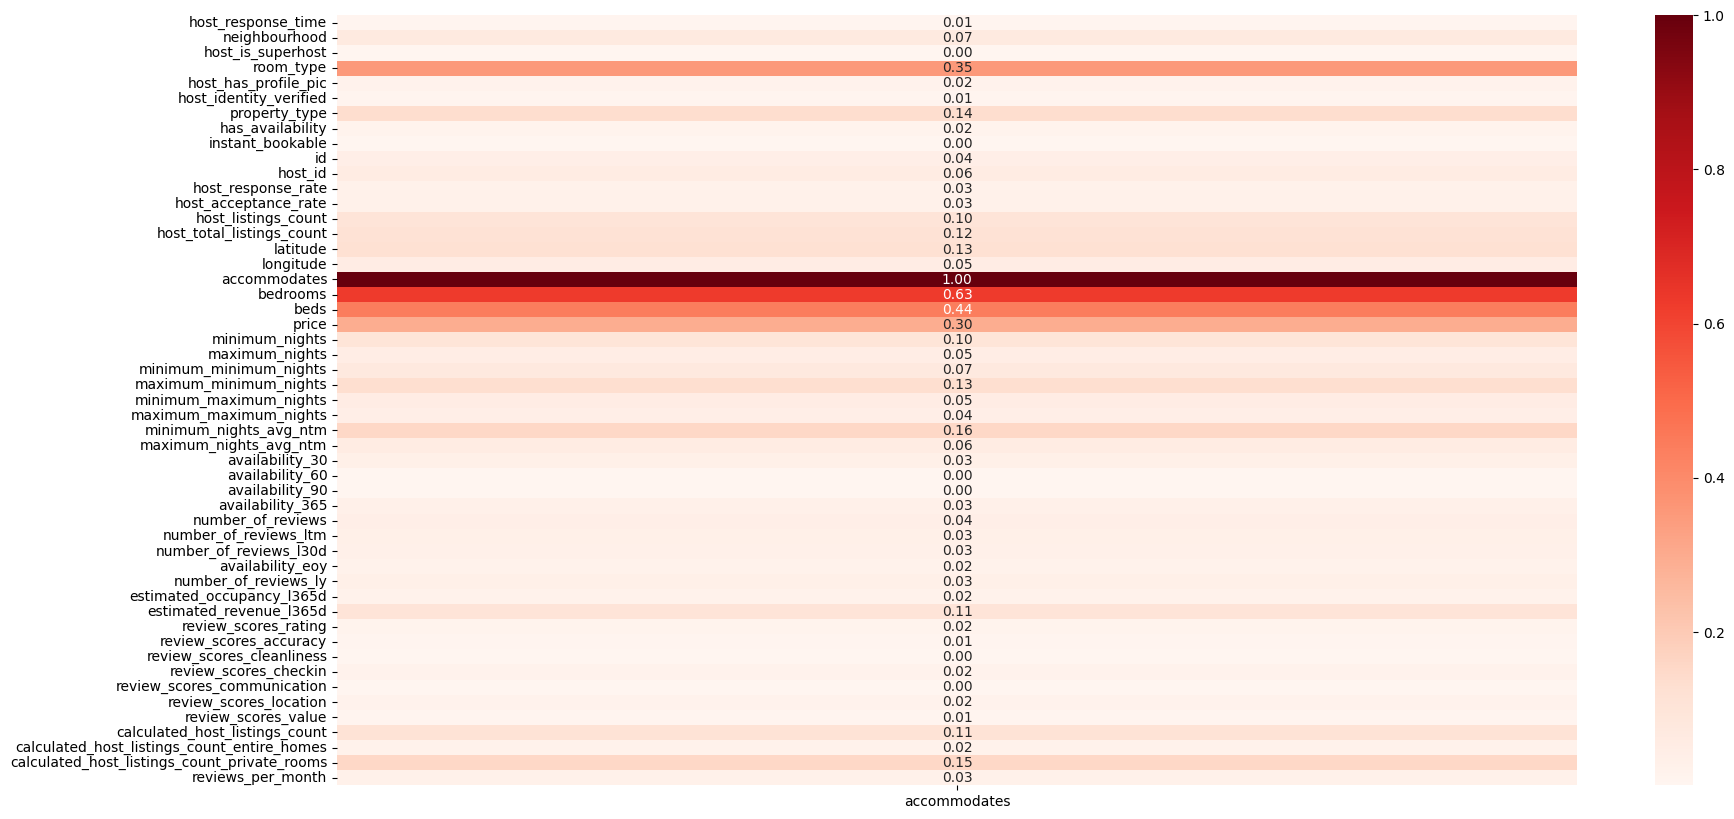

In [33]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [34]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bedrooms']]
Var_Dep= df['accommodates']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [35]:
#Función cuadrática
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['bedrooms'], df['accommodates'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función cuadrática: [0.13073826 0.71424982 2.06884202]
Predicciones:    bedrooms
0  2.913830
1  4.020295
2  4.020295
3  4.020295
4  2.913830


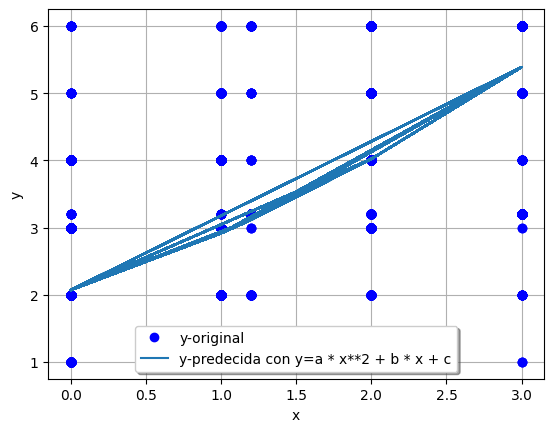

In [36]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [37]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.4008758747338329
Coeficiente de correlación: 0.6331475931675274


##### Modelo 2

In [38]:
#Función valor absoluto
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['bedrooms'], df['accommodates'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función de valor absoluto:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función de valor absoluto: [-110.89186301  111.981556      1.88327335]
Predicciones:    bedrooms
0  2.972966
1  4.062659
2  4.062659
3  4.062659
4  2.972966


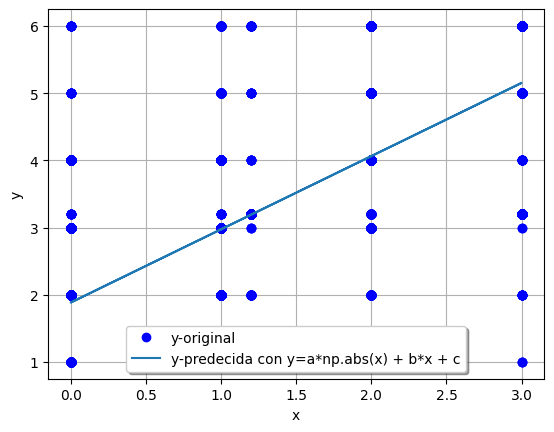

In [39]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [40]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.39441022386355884
Coeficiente de correlación: 0.6280208785251958


#### reviews_per_month (variable objetivo)

In [41]:
corr_Factors = df.corr()[['reviews_per_month']]
corr_Factors = abs(corr_Factors)

<Axes: >

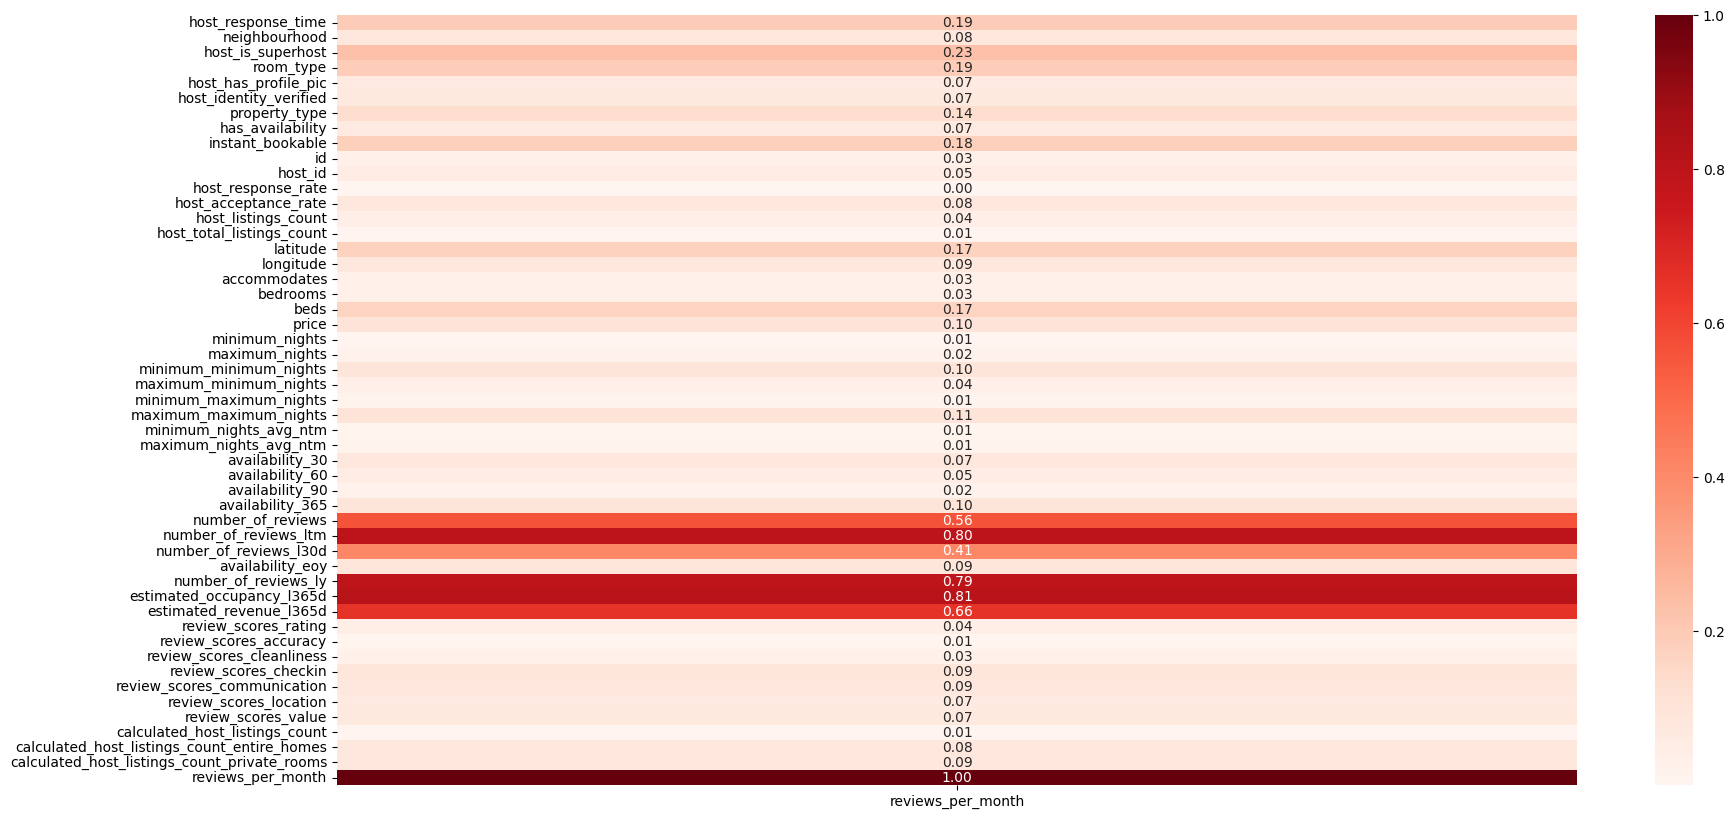

In [42]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['estimated_occupancy_l365d']]
Var_Dep= df['reviews_per_month']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [44]:
#Función cuadrática
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['estimated_occupancy_l365d'], df['reviews_per_month'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función cuadrática: [-1.48544994e-05  1.49573811e-02  2.38229993e-01]
Predicciones:    estimated_occupancy_l365d
0                   1.029260
1                   0.356938
2                   0.386318
3                   1.002613
4                   1.537240


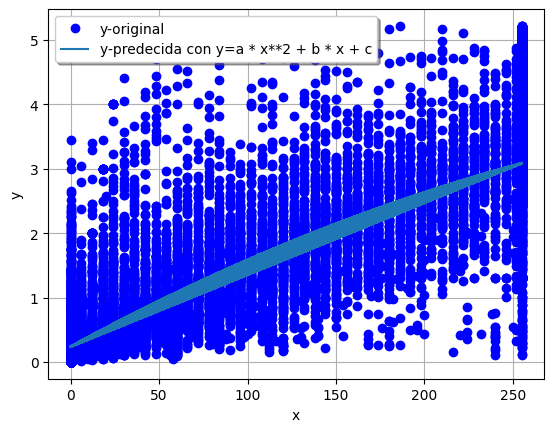

In [45]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [46]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.6689087936080091
Coeficiente de correlación: 0.817868445171966


##### Modelo 2

In [47]:
#Función exponencial
def  func1 (x, a, b, c):
     return  a*np.exp(-b*x) + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['estimated_occupancy_l365d'], df['reviews_per_month'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función exponencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función exponencial: [-1.49200568 94.8261405   1.65503018]
Predicciones:    estimated_occupancy_l365d
0                    1.65503
1                    1.65503
2                    1.65503
3                    1.65503
4                    1.65503


/var/folders/6g/_xkwmvhx4_sg_spcn348_2wc0000gn/T/ipykernel_2240/615179338.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs= curve_fit(func1, df['estimated_occupancy_l365d'], df['reviews_per_month'])


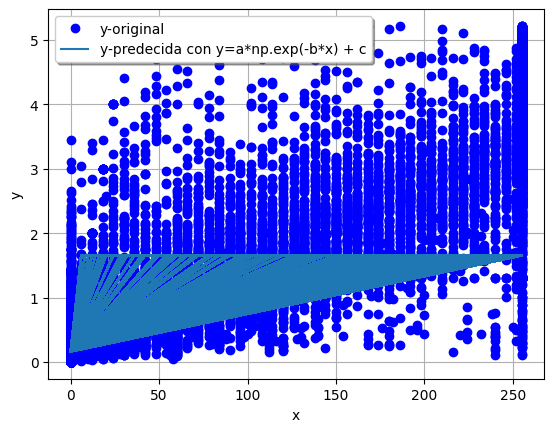

In [48]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.exp(-b*x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [49]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.25789599466206325
Coeficiente de correlación: 0.5078346134934711


#### price(variable objetivo)

In [50]:
corr_Factors = df.corr()[['price']]
corr_Factors = abs(corr_Factors)

<Axes: >

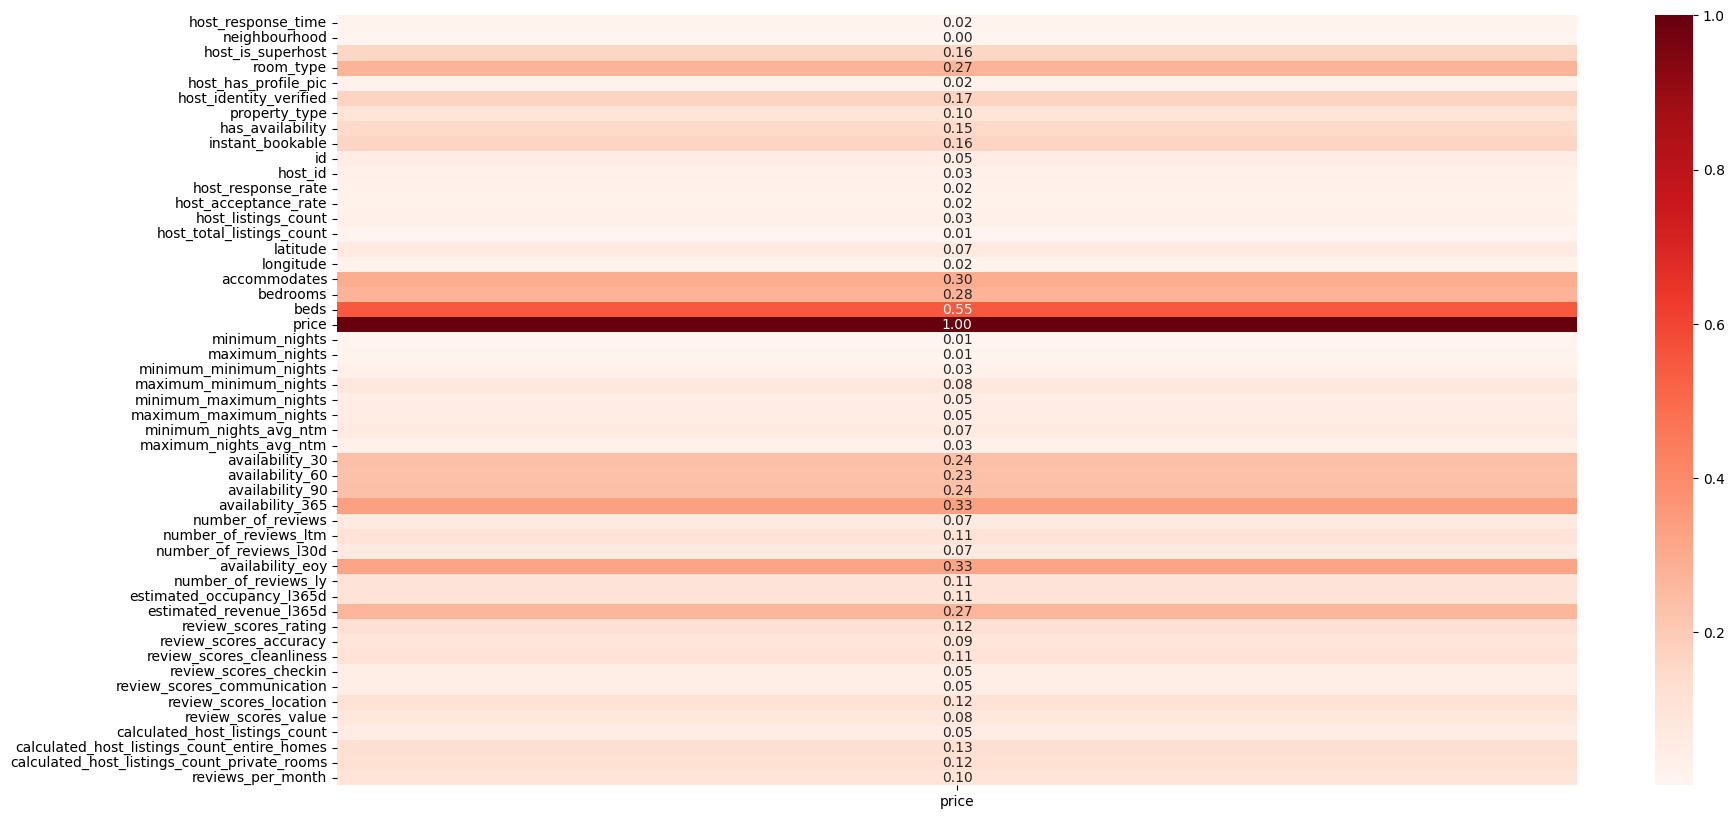

In [51]:
plt.figure(figsize=(20, 10))
Heat_Map = sns.heatmap(corr_Factors, cmap='Reds', annot=True, fmt='.2f')
Heat_Map

In [52]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['price']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

##### Modelo 1

In [53]:
#Función cuadrática
def  func1 (x, a, b, c):
     return a * x**2 + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['beds'], df['price'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función cuadrática:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función cuadrática: [-13.24259195  62.42484994   8.30053663]
Predicciones:         beds
0  76.391759
1   8.300537
2   8.300537
3  80.179869
4  57.482795


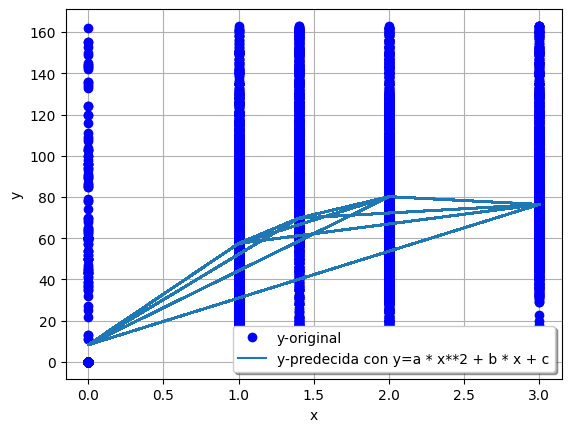

In [54]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a * x**2 + b * x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [55]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.4060040121386954
Coeficiente de correlación: 0.637184441224592


##### Modelo 2

In [56]:
#Función tangencial
def  func1 (x, a, b, c):
     return a*np.tan(x) + b
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['beds'], df['price'])
# Predicciones
y_pred1 = func1(x, *parametros1)
print('Parámetros de la función tangencial:', parametros1)
print('Predicciones:', y_pred1.head())

Parámetros de la función tangencial: [ 1.72119045 59.09785351  1.        ]
Predicciones:         beds
0  58.852504
1  59.097854
2  59.097854
3  55.336984
4  61.778449


/var/folders/6g/_xkwmvhx4_sg_spcn348_2wc0000gn/T/ipykernel_2240/1298026752.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros1, covs= curve_fit(func1, df['beds'], df['price'])


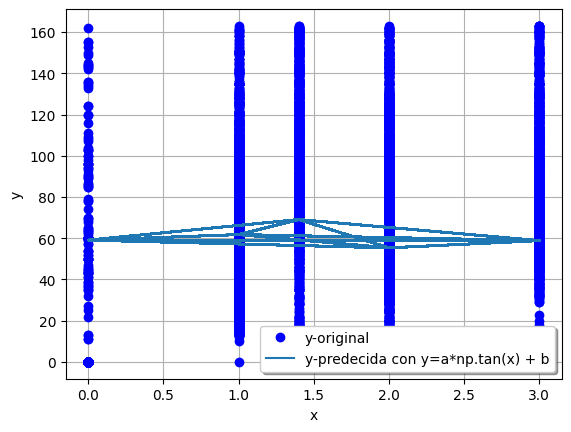

In [57]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [58]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1) 
print(f"Coeficiente de determinación: {R2_Modelo1}")
print(f"Coeficiente de correlación: {R}")

Coeficiente de determinación: 0.013019003986080135
Coeficiente de correlación: 0.11410085006729852


#### Tabla de todos los coeficientes de determinación y correlación

Variables objetivo:
Variables independientes:
Función de regresión no lineal
Coeficiente de determinación
Coeficiente de correlación

In [59]:
#Generamos una tabla con los coeficientes de cada modelo
tabla_coeficientes = {
    "Variable objetivo": [
        "host_response_rate",
        "host_response_rate",
        "host_acceptance_rate",
        "host_acceptance_rate",
        "host_total_listings_count",
        "host_total_listings_count",
        'accommodates',
        'accommodates',
        "reviews_per_month",
        "reviews_per_month",
        'price',
        'price'
    ],
    'Variable independiente': [
        'calculated_host_listings_count',
        'calculated_host_listings_count',
        'instant_bookable',
        'instant_bookable',
        'host_listings_count',
        'host_listings_count',
        'bedrooms',
        'bedrooms',
        'estimated_occupancy_l365d',
        'estimated_occupancy_l365d',
        'beds',
        'beds'
    ],
    'Función': [
        'Cuadrática',
        'Exponencial',
        'Tangencial',
        'Logarítmica',
        'Cuadrática',
        'Senoidal',
        'Cuadrática',
        'Valor Absoluto',
        'Cuadrática',
        'Exponencial',
        'Cuadrática',
        'Tangencial'

    ],
    'Coeficiente de determinación': [
        0.017,
        0.017,
        0.021,
        0.021,
        0.716,
        0.045,
        0.401,
        0.394,
        0.669,
        0.258,
        0.406,
        0.013
    ],
    'Coeficiente de correlación': [
        0.131,
        0.133,
        0.146,
        0.145,
        0.846,
        0.213,
        0.633,
        0.628,
        0.818,
        0.508,
        0.637,
        0.114
    ],
}
df_coeficientes = pd.DataFrame(tabla_coeficientes)
df_coeficientes

,Variable objetivo,Variable independiente,Función,Coeficiente de determinación,Coeficiente de correlación
0,host_response_rate,calculated_host_listings_count,Cuadrática,0.017,0.131
1,host_response_rate,calculated_host_listings_count,Exponencial,0.017,0.133
2,host_acceptance_rate,instant_bookable,Tangencial,0.021,0.146
3,host_acceptance_rate,instant_bookable,Logarítmica,0.021,0.145
4,host_total_listings_count,host_listings_count,Cuadrática,0.716,0.846
5,host_total_listings_count,host_listings_count,Senoidal,0.045,0.213
6,accommodates,bedrooms,Cuadrática,0.401,0.633
7,accommodates,bedrooms,Valor Absoluto,0.394,0.628
8,reviews_per_month,estimated_occupancy_l365d,Cuadrática,0.669,0.818
9,reviews_per_month,estimated_occupancy_l365d,Exponencial,0.258,0.508
